<a href="https://colab.research.google.com/github/jarif87/Fake-News-Detection/blob/main/Fake_News_Detection_Test_9th.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [2]:
from tensorflow.python.keras.layers.pooling import MaxPool1D
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import re

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import  Dense,Embedding,LSTM,Conv1D,MaxPool1D 
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,accuracy_score







In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [4]:
fake=pd.read_csv("/content/gdrive/MyDrive/Fake News Detection Test/data/Fake.csv")

In [5]:
fake.head()


,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [6]:
fake.columns

Index(['title', 'text', 'subject', 'date'], dtype='object')

In [7]:
fake["subject"].value_counts()

News               9050
politics           6841
left-news          4459
Government News    1570
US_News             783
Middle-east         778
Name: subject, dtype: int64

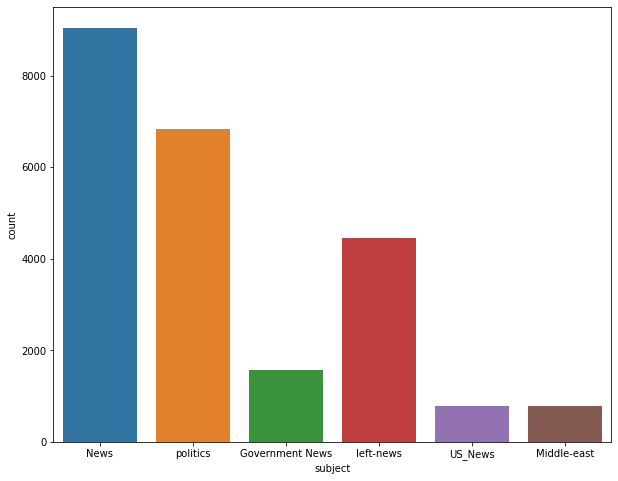

In [8]:
plt.figure(figsize=(10,8))
sns.countplot(x="subject",data=fake)

##WordCloud 

In [9]:
fake["text"].tolist()

['Donald Trump just couldn t wish all Americans a Happy New Year and leave it at that. Instead, he had to give a shout out to his enemies, haters and  the very dishonest fake news media.  The former reality show star had just one job to do and he couldn t do it. As our Country rapidly grows stronger and smarter, I want to wish all of my friends, supporters, enemies, haters, and even the very dishonest Fake News Media, a Happy and Healthy New Year,  President Angry Pants tweeted.  2018 will be a great year for America! As our Country rapidly grows stronger and smarter, I want to wish all of my friends, supporters, enemies, haters, and even the very dishonest Fake News Media, a Happy and Healthy New Year. 2018 will be a great year for America!  Donald J. Trump (@realDonaldTrump) December 31, 2017Trump s tweet went down about as welll as you d expect.What kind of president sends a New Year s greeting like this despicable, petty, infantile gibberish? Only Trump! His lack of decency won t e

In [10]:
text=" ".join(fake["text"].tolist())

In [11]:
" ".join(["this","is","a","book"])

'this is a book'

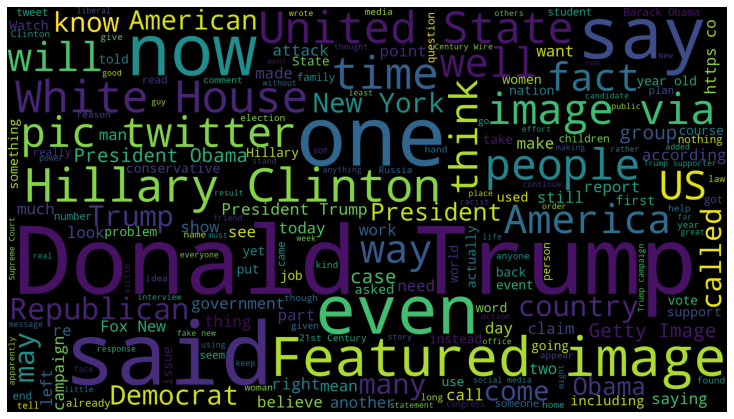

In [12]:
wordcloud=WordCloud(width=1920,height=1080).generate(text)
fig=plt.figure(figsize=(10,10))
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()


## Real News

In [13]:
real=pd.read_csv("/content/gdrive/MyDrive/Fake News Detection Test/data/True.csv")

In [14]:
text=" ".join(real["text"].tolist())

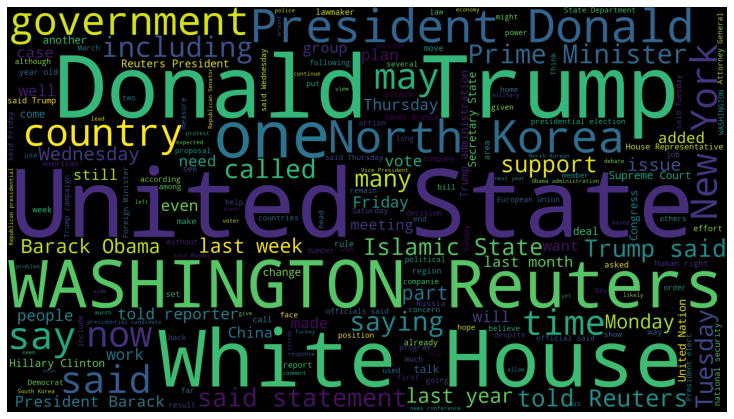

In [15]:
wordcloud=WordCloud(width=1920,height=1080).generate(text)
fig=plt.figure(figsize=(10,10))
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()


In [16]:
real.sample(5)

,title,text,subject,date
6743,Trump packs trade team with veterans of steel ...,WASHINGTON (Reuters) - President-elect Donald ...,politicsNews,"December 9, 2016"
18483,Trial of alleged ringleader of Benghazi attack...,WASHINGTON (Reuters) - Federal prosecutors ope...,worldnews,"October 2, 2017"
2077,Bruising debate brings a reluctant Trump aroun...,WASHINGTON (Reuters) - U.S. President Donald T...,politicsNews,"August 22, 2017"
6666,Trump to Pennsylvania: See you in four years,"HERSHEY, Pa. (Reuters) - Ready for another Don...",politicsNews,"December 16, 2016"
19618,Caribbean oil terminals make preparations ahea...,HOUSTON (Reuters) - Several Caribbean oil stor...,worldnews,"September 19, 2017"


In [17]:
unknown_publishers=[]
for index,row in enumerate(real.text.values):
   try:
     record=row.split("-",  maxsplit=1)
     record[1]
     
     assert(len(record[0])<120)
   except:
    unknown_publishers.append(index)

In [18]:
len(unknown_publishers)

222

In [19]:
real.iloc[unknown_publishers].text

7        The following statements were posted to the ve...
8        The following statements were posted to the ve...
12       The following statements were posted to the ve...
13       The following statements were posted to the ve...
14        (In Dec. 25 story, in second paragraph, corre...
                               ...                        
20135     (Story corrects to million from billion in pa...
20500     (This Sept 8 story corrects headline, clarifi...
20667     (Story refiles to add dropped word  not , in ...
21246     (Story corrects third paragraph to show Mosul...
21339     (Story corrects to fix spelling in paragraph ...
Name: text, Length: 222, dtype: object

In [20]:
real.iloc[8970]

title      Graphic: Supreme Court roundup
text                                     
subject                      politicsNews
date                       June 16, 2016 
Name: 8970, dtype: object

In [21]:
real=real.drop(8970,axis=0)

In [22]:
publisher=[]
temp_text=[]
for index,row in enumerate(real.text.values):
  if index in unknown_publishers:
    temp_text.append(row)
    publisher.append("unknow")
  else:
    record=row.split("-",maxsplit=1)
    publisher.append(record[0].strip())
    temp_text.append(record[1].strip())



In [23]:
real["publisher"]=publisher
real["text"]=temp_text


In [24]:
real.head()

,title,text,subject,date,publisher
0,"As U.S. budget fight looms, Republicans flip t...",The head of a conservative Republican faction ...,politicsNews,"December 31, 2017",WASHINGTON (Reuters)
1,U.S. military to accept transgender recruits o...,Transgender people will be allowed for the fir...,politicsNews,"December 29, 2017",WASHINGTON (Reuters)
2,Senior U.S. Republican senator: 'Let Mr. Muell...,The special counsel investigation of links bet...,politicsNews,"December 31, 2017",WASHINGTON (Reuters)
3,FBI Russia probe helped by Australian diplomat...,Trump campaign adviser George Papadopoulos tol...,politicsNews,"December 30, 2017",WASHINGTON (Reuters)
4,Trump wants Postal Service to charge 'much mor...,President Donald Trump called on the U.S. Post...,politicsNews,"December 29, 2017",SEATTLE/WASHINGTON (Reuters)


In [25]:
real.shape

(21416, 5)

In [26]:
empty_fake_index=[index for index,text in enumerate(fake.text.tolist()) if str(text).strip()==""]

In [27]:
fake.iloc[empty_fake_index]

,title,text,subject,date
10923,TAKE OUR POLL: Who Do You Think President Trum...,,politics,"May 10, 2017"
11041,Joe Scarborough BERATES Mika Brzezinski Over “...,,politics,"Apr 26, 2017"
11190,WATCH TUCKER CARLSON Scorch Sanctuary City May...,,politics,"Apr 6, 2017"
11225,MAYOR OF SANCTUARY CITY: Trump Trying To Make ...,,politics,"Apr 2, 2017"
11236,SHOCKER: Public School Turns Computer Lab Into...,,politics,"Apr 1, 2017"
...,...,...,...,...
21816,BALTIMORE BURNS: MARYLAND GOVERNOR BRINGS IN N...,,left-news,"Apr 27, 2015"
21826,FULL VIDEO: THE BLOCKBUSTER INVESTIGATION INTO...,,left-news,"Apr 25, 2015"
21827,(VIDEO) HILLARY CLINTON: RELIGIOUS BELIEFS MUS...,,left-news,"Apr 25, 2015"
21857,(VIDEO)ICE PROTECTING OBAMA: WON’T RELEASE NAM...,,left-news,"Apr 14, 2015"


In [28]:
real["text"] =real["title"]+""+ real["text"]
fake["text"] =fake["title"]+""+ fake["text"]

In [29]:
real["text"]=real["text"].apply(lambda x:str(x).lower())
fake["text"]=fake["text"].apply(lambda x:str(x).lower())

##Preprocessing Text

In [30]:
real["class"]=1
fake["class"]=0

In [31]:
real.columns

Index(['title', 'text', 'subject', 'date', 'publisher', 'class'], dtype='object')

In [32]:
real=real[["text","class"]]

In [33]:
fake=fake[["text","class"]]

In [34]:
data=real.append(fake,ignore_index=True)


In [35]:
data.sample(5)

,text,class
40669,boom! tx governor will cut funding to county w...,0
36618,"watch how anti-american actress, emily blunt “...",0
18506,factbox: how catalan autonomy stacks up agains...,1
40116,iran makes major announcement about how they p...,0
7458,republicans defend grip on u.s. congress as tr...,1


In [36]:
! pip install spacy==2.2.3
! python -m spacy download en_core_web_sm
! pip install beautifulsoup4==4.9.1
! pip install textblob==0.15.3
! pip install git+https://github.com/laxmimerit/preprocess_kgptalkie.git --upgrade --force-reinstall

     |████████████████████████████████| 10.4 MB 4.8 MB/s 
     |████████████████████████████████| 2.2 MB 27.2 MB/s 
  Attempting uninstall: thinc
    Found existing installation: thinc 7.4.0
    Uninstalling thinc-7.4.0:
      Successfully uninstalled thinc-7.4.0
  Attempting uninstall: spacy
    Found existing installation: spacy 2.2.4
    Uninstalling spacy-2.2.4:
      Successfully uninstalled spacy-2.2.4
     |████████████████████████████████| 12.0 MB 4.4 MB/s 
✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')
     |████████████████████████████████| 115 kB 5.6 MB/s 
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.6.3
    Uninstalling beautifulsoup4-4.6.3:
      Successfully uninstalled beautifulsoup4-4.6.3
  Cloning https://github.com/laxmimerit/preprocess_kgptalkie.git to /tmp/pip-req-build-txbu0z27
  Running command git clone -q https://github.com/laxmimerit/preprocess_kgptalkie.git /tmp/pip

In [37]:
import preprocess_kgptalkie as ps

In [38]:
data["text"].apply(lambda x: ps.remove_special_chars(x))

0        as us budget fight looms republicans flip thei...
1        us military to accept transgender recruits on ...
2        senior us republican senator let mr mueller do...
3        fbi russia probe helped by australian diplomat...
4        trump wants postal service to charge much more...
                               ...                        
44892    mcpain john mccain furious that iran treated u...
44893    justice yahoo settles email privacy classactio...
44894    sunnistan us and allied safe zone plan to take...
44895    how to blow 700 million al jazeera america fin...
44896    10 us navy sailors held by iranian military si...
Name: text, Length: 44897, dtype: object

In [39]:
ps.remove_special_chars("ths is , . ! @ a book")

'ths is a book'

In [40]:
data.head()

,text,class
0,"as u.s. budget fight looms, republicans flip t...",1
1,u.s. military to accept transgender recruits o...,1
2,senior u.s. republican senator: 'let mr. muell...,1
3,fbi russia probe helped by australian diplomat...,1
4,trump wants postal service to charge 'much mor...,1


In [41]:
import gensim

In [42]:
y=data["class"].values

In [43]:
X=[d.split() for d in data["text"].tolist()]


In [44]:
type(X)
print(X[0])

['as', 'u.s.', 'budget', 'fight', 'looms,', 'republicans', 'flip', 'their', 'fiscal', 'scriptthe', 'head', 'of', 'a', 'conservative', 'republican', 'faction', 'in', 'the', 'u.s.', 'congress,', 'who', 'voted', 'this', 'month', 'for', 'a', 'huge', 'expansion', 'of', 'the', 'national', 'debt', 'to', 'pay', 'for', 'tax', 'cuts,', 'called', 'himself', 'a', '“fiscal', 'conservative”', 'on', 'sunday', 'and', 'urged', 'budget', 'restraint', 'in', '2018.', 'in', 'keeping', 'with', 'a', 'sharp', 'pivot', 'under', 'way', 'among', 'republicans,', 'u.s.', 'representative', 'mark', 'meadows,', 'speaking', 'on', 'cbs’', '“face', 'the', 'nation,”', 'drew', 'a', 'hard', 'line', 'on', 'federal', 'spending,', 'which', 'lawmakers', 'are', 'bracing', 'to', 'do', 'battle', 'over', 'in', 'january.', 'when', 'they', 'return', 'from', 'the', 'holidays', 'on', 'wednesday,', 'lawmakers', 'will', 'begin', 'trying', 'to', 'pass', 'a', 'federal', 'budget', 'in', 'a', 'fight', 'likely', 'to', 'be', 'linked', 'to', '

In [45]:
DIM=100
w2v_model=gensim.models.Word2Vec(sentences=X,size=DIM,window=10,min_count=1)

In [46]:
len(w2v_model.wv.vocab)

399291

In [47]:
w2v_model.wv["nice"]

array([ 0.736275  , -1.1911904 ,  0.723432  , -0.17299208,  2.9615555 ,
        0.7944711 ,  0.43888596, -2.0824885 , -0.21058708,  2.3000944 ,
        0.8861045 , -1.3558916 ,  0.9990222 ,  0.91662616, -1.0320354 ,
        2.0843892 , -2.795586  ,  0.35909367,  0.64240146, -2.1932902 ,
       -0.20890442,  2.2823339 ,  0.16301057,  1.7240251 , -1.1768701 ,
       -0.21392111,  0.31559217,  1.9284158 ,  1.3272239 ,  2.7301667 ,
        0.9610877 , -1.0521178 ,  0.73158354,  0.35593033,  0.57173806,
       -1.7030156 ,  0.29600853, -0.03000676,  3.705883  ,  2.0182478 ,
       -1.8985229 ,  1.4236931 ,  0.02651654,  1.4988859 ,  0.59516656,
        1.9502407 , -0.74613047,  3.1111615 ,  0.71256226,  0.87915355,
        0.14503181, -2.070818  , -0.36288062,  2.6209726 , -0.2758291 ,
       -0.7579407 ,  0.3946304 ,  2.4276958 , -0.23484153,  0.15890986,
       -0.8343645 ,  0.08880106,  1.2408983 , -1.6726902 ,  0.3185015 ,
       -1.077366  , -1.9494287 , -0.26405665, -0.8380318 , -0.53

In [48]:
w2v_model.wv.most_similar("bangladesh")

[('rohingya', 0.8259492516517639),
 ('bangladesh,', 0.8189427852630615),
 ('myanmar', 0.7604737281799316),
 ('bangladesh.', 0.7531932592391968),
 ('myanmar,', 0.7216164469718933),
 ('rohingyas', 0.7196481227874756),
 ('rakhine,', 0.6751697659492493),
 ('600,000', 0.6747606992721558),
 ('bangladeshi', 0.670896589756012),
 ('myanmar.', 0.6705237627029419)]

In [49]:
tokenizer=Tokenizer()
tokenizer.fit_on_texts(X)

In [50]:
X=tokenizer.texts_to_sequences(X)

In [51]:
##tokenizer.word_index

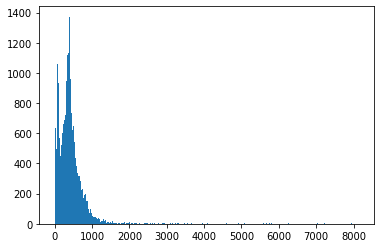

In [52]:
plt.hist([len(x) for x in X],bins=700)
plt.show()

In [53]:
nos=np.array([len(x) for x in X])
len(nos[nos>1000])

1593

In [54]:
maxlen=1000
X=pad_sequences(X,maxlen=maxlen)

In [55]:
len(X[0])

1000

In [56]:
vocab_size=len(tokenizer.word_index)+1
vocab=tokenizer.word_index

In [57]:
def get_weight_matrix(model):
   weight_matrix=np.zeros((vocab_size,DIM))

   for word, i in vocab.items():
       weight_matrix[i]=model.wv[word]
   return weight_matrix
  


In [58]:
embedding_vectors=get_weight_matrix(w2v_model)

In [59]:
embedding_vectors.shape

(399292, 100)

In [64]:
model=Sequential()
model.add(Embedding(vocab_size,output_dim=DIM,weights=[embedding_vectors],input_length=maxlen,trainable=True))
model.add(LSTM(units=128))
model.add(Dense(1,activation="sigmoid"))
model.compile(optimizer="adam",loss="binary_crossentropy",metrics=["acc"])


In [65]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 1000, 100)         39929200  
                                                                 
 lstm_1 (LSTM)               (None, 128)               117248    
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                                 
Total params: 40,046,577
Trainable params: 40,046,577
Non-trainable params: 0
_________________________________________________________________


In [66]:
X_train,X_test,y_train,y_test=train_test_split(X,y)

In [68]:
model.fit(X_train,y_train,validation_split=0.3,epochs=7)

Epoch 1/7
737/737 [==============================] - 144s 196ms/step - loss: 5.3400e-05 - acc: 1.0000 - val_loss: 0.0332 - val_acc: 0.9931
Epoch 2/7
737/737 [==============================] - 144s 196ms/step - loss: 2.6824e-05 - acc: 1.0000 - val_loss: 0.0339 - val_acc: 0.9934
Epoch 3/7
737/737 [==============================] - 145s 197ms/step - loss: 1.6370e-05 - acc: 1.0000 - val_loss: 0.0362 - val_acc: 0.9935
Epoch 4/7
737/737 [==============================] - 145s 197ms/step - loss: 1.0585e-05 - acc: 1.0000 - val_loss: 0.0374 - val_acc: 0.9935
Epoch 5/7
737/737 [==============================] - 144s 196ms/step - loss: 6.8913e-06 - acc: 1.0000 - val_loss: 0.0386 - val_acc: 0.9935
Epoch 6/7
737/737 [==============================] - 144s 195ms/step - loss: 4.6301e-06 - acc: 1.0000 - val_loss: 0.0394 - val_acc: 0.9933
Epoch 7/7
737/737 [==============================] - 144s 195ms/step - loss: 3.0671e-06 - acc: 1.0000 - val_loss: 0.0412 - val_acc: 0.9936
